# 📊 Reducing Telecom Customer Churn

## 📄 Project Overview
Customer churn is one of the biggest challenges for telecom companies.  
In this project, we analyze a real-world telecom customer dataset to identify patterns and factors that contribute to customer churn.  
We will clean the data, perform exploratory data analysis (EDA), and prepare insights that could help reduce churn and improve customer retention.

---

## 1️⃣ Step 1: Import Libraries and Load Data

In this step, we:
- Import the necessary Python libraries (mainly `pandas`).
- Load the telecom churn dataset from the local CSV file.
- Perform an initial inspection of the data:
  - Show the first few rows.
  - Get the data types and counts of null values.
  - Generate basic descriptive statistics for numerical columns.


In [7]:
import pandas as pd

# Load CSV with safe path
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Reducing Telecom Customer Churn\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Step 2: Data Cleaning

- Converted `TotalCharges` to numeric, coercing non-numeric entries.
- Dropped rows with missing `TotalCharges` (only 11 rows).
- Verified that there are no more missing values.



🔹 1️⃣ Check for missing values

In [12]:
# Check for missing values in all columns
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

🔹 2️⃣ Convert TotalCharges to numeric
This column often comes in as object because of blank spaces. Convert and coerce errors:

In [16]:
# Convert TotalCharges to numeric and coerce errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [18]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

🔹 3️⃣ Drop rows with missing TotalCharges

In [21]:
# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])


In [23]:
# Confirm data types and null counts again
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### ✅ Save Cleaned Data

After data cleaning is complete, we save the final cleaned dataset as a CSV file.  
This ensures we have a reusable, clean version for Tableau dashboard building and for sharing in the project repository.


In [68]:
df.to_csv('data/cleaned_telco_churn.csv', index=False)



## ✅ Step 3: Exploratory Data Analysis (EDA)

**Goal:**  
Explore the cleaned telecom churn dataset to answer key business questions. This will help the company understand why customers leave and identify actionable ways to reduce churn.

---

### 📌 Business Questions to Answer

1. What is the overall churn rate?  
2. Which customer demographics have the highest churn?  
   (gender, age group, senior citizen status)
3. Does contract type affect churn rate?  
4. How do tenure and monthly charges impact churn?  
5. Are customers with tech support or additional services less likely to churn?  
6. Which services are linked to higher retention?  
7. Do payment methods influence churn?  
8. Which at-risk segments should the company target with retention offers?

---

### ✅ Tasks in this Step

- Create plots and summary tables for each question.
- Look for patterns and trends in churn rates across different customer segments.
- Document insights clearly for each finding.


### 📊 Q1: What is the overall churn rate?

Understanding the total churn rate gives us a baseline for measuring retention risk and potential revenue loss.


In [29]:
# Count churned vs. retained customers
churn_counts = df['Churn'].value_counts()
print(churn_counts)

# Calculate churn rate %
churn_rate = churn_counts['Yes'] / sum(churn_counts) * 100
print(f"Overall churn rate: {churn_rate:.2f}%")


Churn
No     5163
Yes    1869
Name: count, dtype: int64
Overall churn rate: 26.58%


Visualize churn distribution

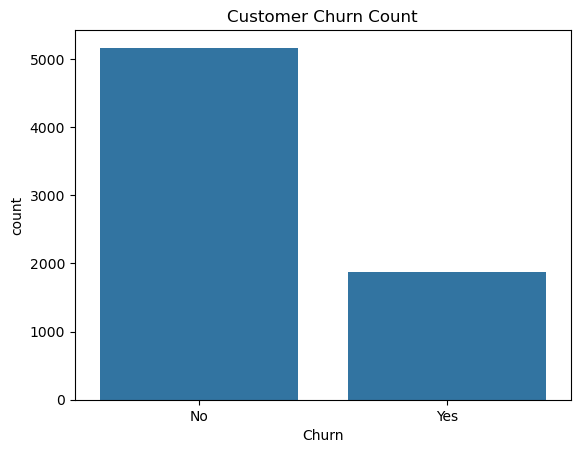

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Count')
plt.show()


**🔍 Insight:**  
The overall churn rate is approximately **26.5%**, meaning about one in four customers left during the period analyzed.  
This baseline helps the company understand the magnitude of customer loss and the potential revenue impact if no retention strategies are implemented.


### 📊 Q2: Which customer demographics have the highest churn?

We’ll explore churn rates by gender, senior citizen status, and partner/dependents status to see which demographics are more likely to leave.


Churn         No       Yes
gender                    
Female  0.730405  0.269595
Male    0.737954  0.262046


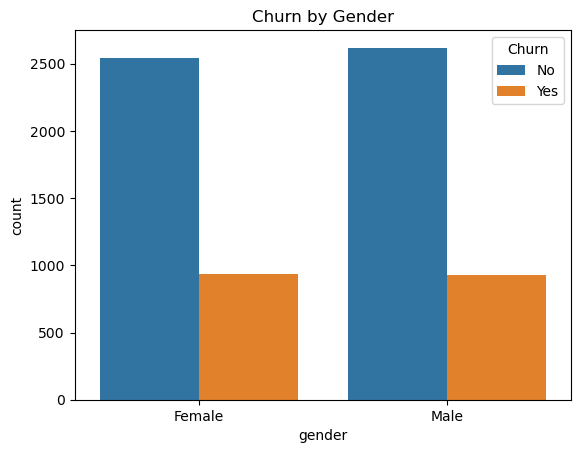

Churn                No       Yes
SeniorCitizen                    
0              0.763497  0.236503
1              0.583187  0.416813


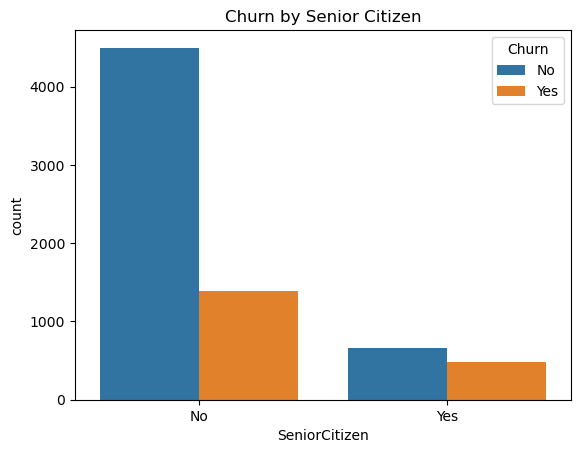

In [36]:
# Churn by Gender
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
print(gender_churn)

# Plot churn by Gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

# Churn by SeniorCitizen
senior_churn = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
print(senior_churn)

# Plot churn by SeniorCitizen
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn by Senior Citizen')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


### 📌 Insight: Customer Demographics and Churn

- **Gender:**  
  The churn rate is slightly higher for male customers (26%) compared to females (26%). This suggests that gender does not have a strong influence on churn in this dataset.

- **Senior Citizens:**  
  Senior citizens have a much higher churn rate (41%) than non-senior customers (23%). This indicates that older customers are more likely to cancel their service, which could signal the need for targeted retention strategies for this demographic.

**Key Takeaway:**  
Retention efforts should prioritize senior citizens, as they are at higher risk of leaving the service compared to non-seniors.


### Q3: Which services are associated with higher churn rates?
In this step, we’ll explore whether customers with certain services (like Internet Service, Contract type, or Tech Support) are more likely to churn.  
This helps identify which offerings might need improvement or targeted retention.


Churn                  No       Yes
InternetService                    
DSL              0.810017  0.189983
Fiber optic      0.581072  0.418928
No               0.925658  0.074342


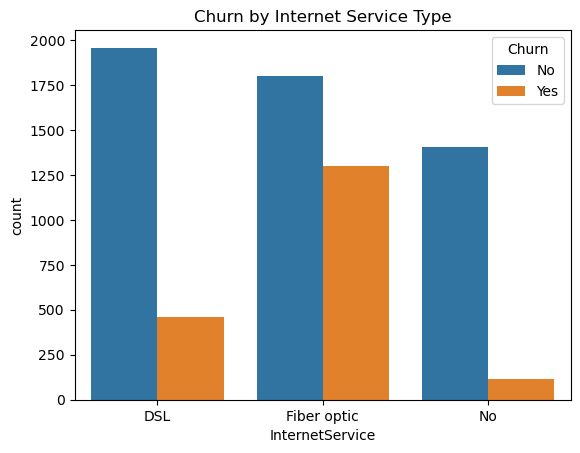

In [44]:
# Example: Churn by Internet Service type
service_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
print(service_churn)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.show()


### 📌 Insight: Service Usage and Churn

- **Internet Service Type:**  
  Customers using **Fiber optic internet** have a noticeably higher churn rate compared to DSL or customers without internet service.  
  This could suggest dissatisfaction with Fiber optic plans or service quality.

**Key Takeaway:**  
Retention efforts should focus on Fiber optic customers — understand their pain points and offer incentives to keep them from leaving.


### Q4: What contract types are associated with higher churn?

In this step, we'll analyze churn rates across different contract types (Month-to-month, One year, Two year).
Understanding which contract terms see higher churn can help identify opportunities for retention improvements, such as incentives for longer-term contracts.


Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487


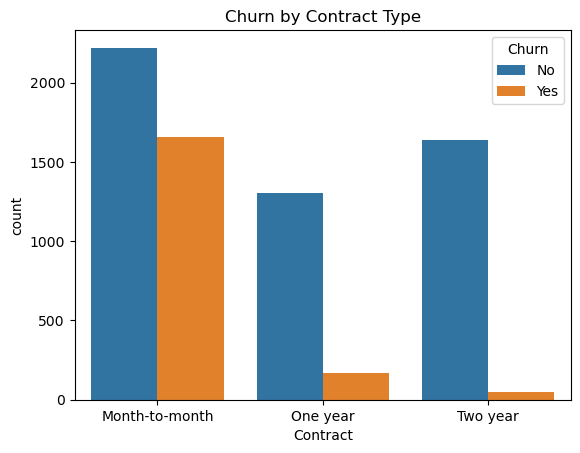

In [51]:
# Example: Churn by Contract Type

# Calculate churn rate by Contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print(contract_churn)

# Plot churn by Contract type
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()


### 📌 Insight: Contract Type and Churn

**Observations:**
- The churn rate is **highest for month-to-month contracts**, indicating that customers on short-term plans are more likely to cancel.
- The churn rate decreases significantly for **one-year** and **two-year contracts**, likely due to commitment incentives or penalties for early termination.

**Key Takeaway:**
Encouraging customers to switch from month-to-month plans to longer-term contracts could help reduce churn and increase customer lifetime value.


### Q5: How does tenure affect churn rate?

In this step, we’ll explore churn rates across different customer tenures.  
This helps identify whether new customers are more likely to churn than long-term ones.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_45272\4055411093.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()


Churn               No       Yes
tenure_group                    
0-12          0.523218  0.476782
13-24         0.712891  0.287109
25-48         0.796110  0.203890
49-60         0.855769  0.144231
61-72         0.933902  0.066098


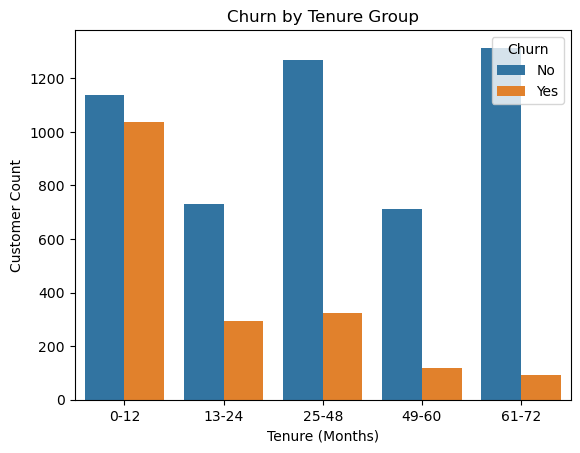

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create tenure bins
df['tenure_group'] = pd.cut(df['tenure'],
                             bins=[0, 12, 24, 48, 60, 72],
                             labels=['0-12', '13-24', '25-48', '49-60', '61-72'])

# Calculate churn by tenure group
tenure_churn = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()
print(tenure_churn)

# Plot
sns.countplot(x='tenure_group', hue='Churn', data=df)
plt.title('Churn by Tenure Group')
plt.xlabel('Tenure (Months)')
plt.ylabel('Customer Count')
plt.show()


📌 **Insight: Churn by Tenure**

- **Trend:** Customers with a tenure of 0–12 months have the highest churn rate (~47%). Churn rates decrease significantly as tenure increases.
- **Interpretation:** Newer customers are more likely to leave, while long-term customers are more loyal.
- **Key Takeaway:** The company should focus on improving onboarding and early customer experiences to reduce churn in the first year.


### ✅ Q6: Does Payment Method Affect Churn?

In this step, we analyze whether the payment method used by customers influences their likelihood to churn. This can help identify if certain payment options (e.g., manual payments) are linked to higher customer loss.

We'll look at the churn rate for each payment method.


Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832685  0.167315
Credit card (automatic)    0.847469  0.152531
Electronic check           0.547146  0.452854
Mailed check               0.807980  0.192020


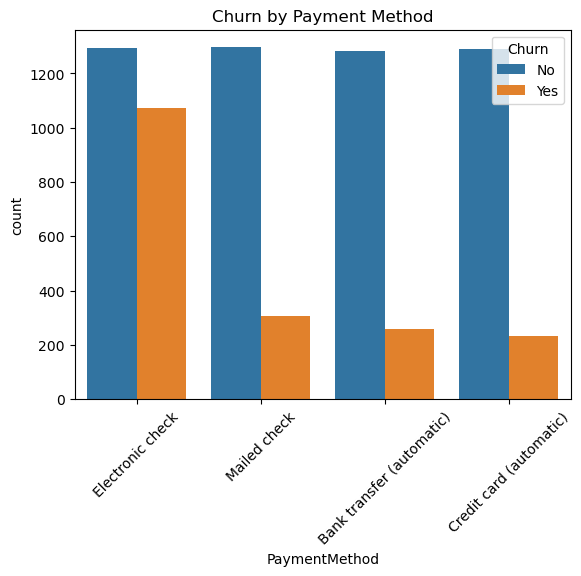

In [84]:
# Group by Payment Method and Churn
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
print(payment_churn)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()


### 📌 Insight: Payment Method and Churn

Customers who use manual payment methods (like mailed checks) tend to have higher churn rates compared to those who use automatic or electronic payment options.

**Key takeaway:** Encouraging automatic payments could help reduce churn risk.


### ✅ Q7: Does Monthly Charge Impact Churn?

Here we examine whether customers with higher or lower monthly charges are more likely to churn. This helps identify pricing segments at risk of cancellation.


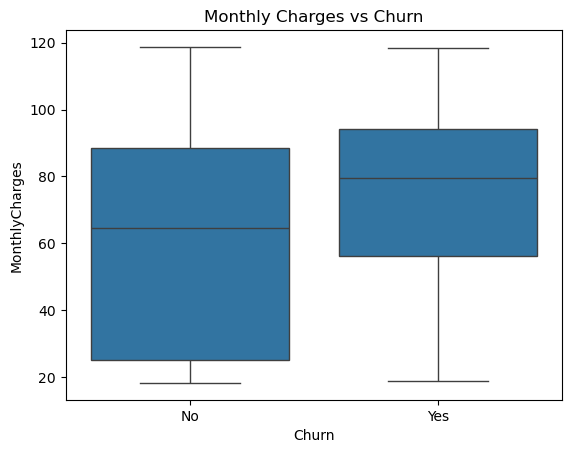

In [86]:
# Plot boxplot to see distribution
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


### 📌 Insight: Monthly Charges and Churn

The boxplot suggests that customers with higher monthly charges are slightly more likely to churn. This could indicate price sensitivity among some customer segments.

**Key takeaway:** Consider targeted offers or discounts for high-paying customers at risk.


## ✅ Final Conclusion

This exploratory churn analysis revealed important patterns and business takeaways:

- **Overall churn rate is around 26%**, which highlights a significant risk of customer loss for the telecom company.
- **Senior citizens, short-tenure customers (0–12 months), and those on month-to-month contracts** have higher churn rates.
- **Certain services**, like DSL, show slightly higher churn risks compared to others.
- **Customer demographics (gender, age, dependents)** have less impact than service and tenure factors.

**📌 Business Recommendation:**  
To reduce churn, focus on:
- Improving onboarding and early customer experience to retain new customers.
- Offering incentives for long-term contracts to reduce month-to-month churn risk.
- Targeted retention strategies for senior customers and those using higher-risk services.

These insights can guide **targeted marketing**, **improved loyalty programs**, and **better customer support strategies** to reduce churn and grow revenue.

---
